In [ ]:
! pip install --upgrade tensorflow
! pip install --upgrade scikit-learn

In [ ]:
! cp /content/drive/MyDrive/Datasets/Final_Data_DONE_1.zip /content/
! unzip /content/Final_Data_DONE_1.zip

Streaming output truncated to the last 5000 lines.
  inflating: content/content/content/Final_Data_1/proccesed_train_images/neutral/modifed_fer0001645.png  
  inflating: content/content/content/Final_Data_1/proccesed_train_images/neutral/modifed_fer0021147.png  
  inflating: content/content/content/Final_Data_1/proccesed_train_images/neutral/modifed_fer0002036.png  
  inflating: content/content/content/Final_Data_1/proccesed_train_images/neutral/modifed_fer0013206.png  
  inflating: content/content/content/Final_Data_1/proccesed_train_images/neutral/modifed_fer0023497.png  
  inflating: content/content/content/Final_Data_1/proccesed_train_images/neutral/modifed_fer0011058.png  
  inflating: content/content/content/Final_Data_1/proccesed_train_images/neutral/modifed_fer0008564.png  
  inflating: content/content/content/Final_Data_1/proccesed_train_images/neutral/modifed_fer0018647.png  
  inflating: content/content/content/Final_Data_1/proccesed_train_images/neutral/modifed_fer0017984.p

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
#paths to data
train_dir='/content/content/content/content/Final_Data_1/proccesed_train_images'
valid_dir='/content/content/content/content/Final_Data_1/proccesed_test_images'
test_dir='/content/content/content/content/Final_Data_1/proccesed_validation_images'
img_size=224

In [ ]:
"""
Applying data augmentation to the images as we read
them from their respectivve directories
"""
train_batches  = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 8,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    shuffle=True
                                                   )
validation_batches = validation_datagen.flow_from_directory( directory = valid_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 8,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                                shuffle=True                                                       )
test_batches=test_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 8,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              shuffle=True
                                                             )

Found 69044 images belonging to 7 classes.
Found 7125 images belonging to 7 classes.
Found 4143 images belonging to 7 classes.


In [ ]:
import os
import shutil
path=os.path.join(train_dir,'.ipynb_checkpoints')
shutil.rmtree(path)

In [ ]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
def plotImages(img_arr):
    fig,axes=plt.subplots(1,10,figsize=(20,20))
    axes=axes.flatten()
    for img,ax in zip(img_arr,axes):
        ax.imshow(img,cmap='gray')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

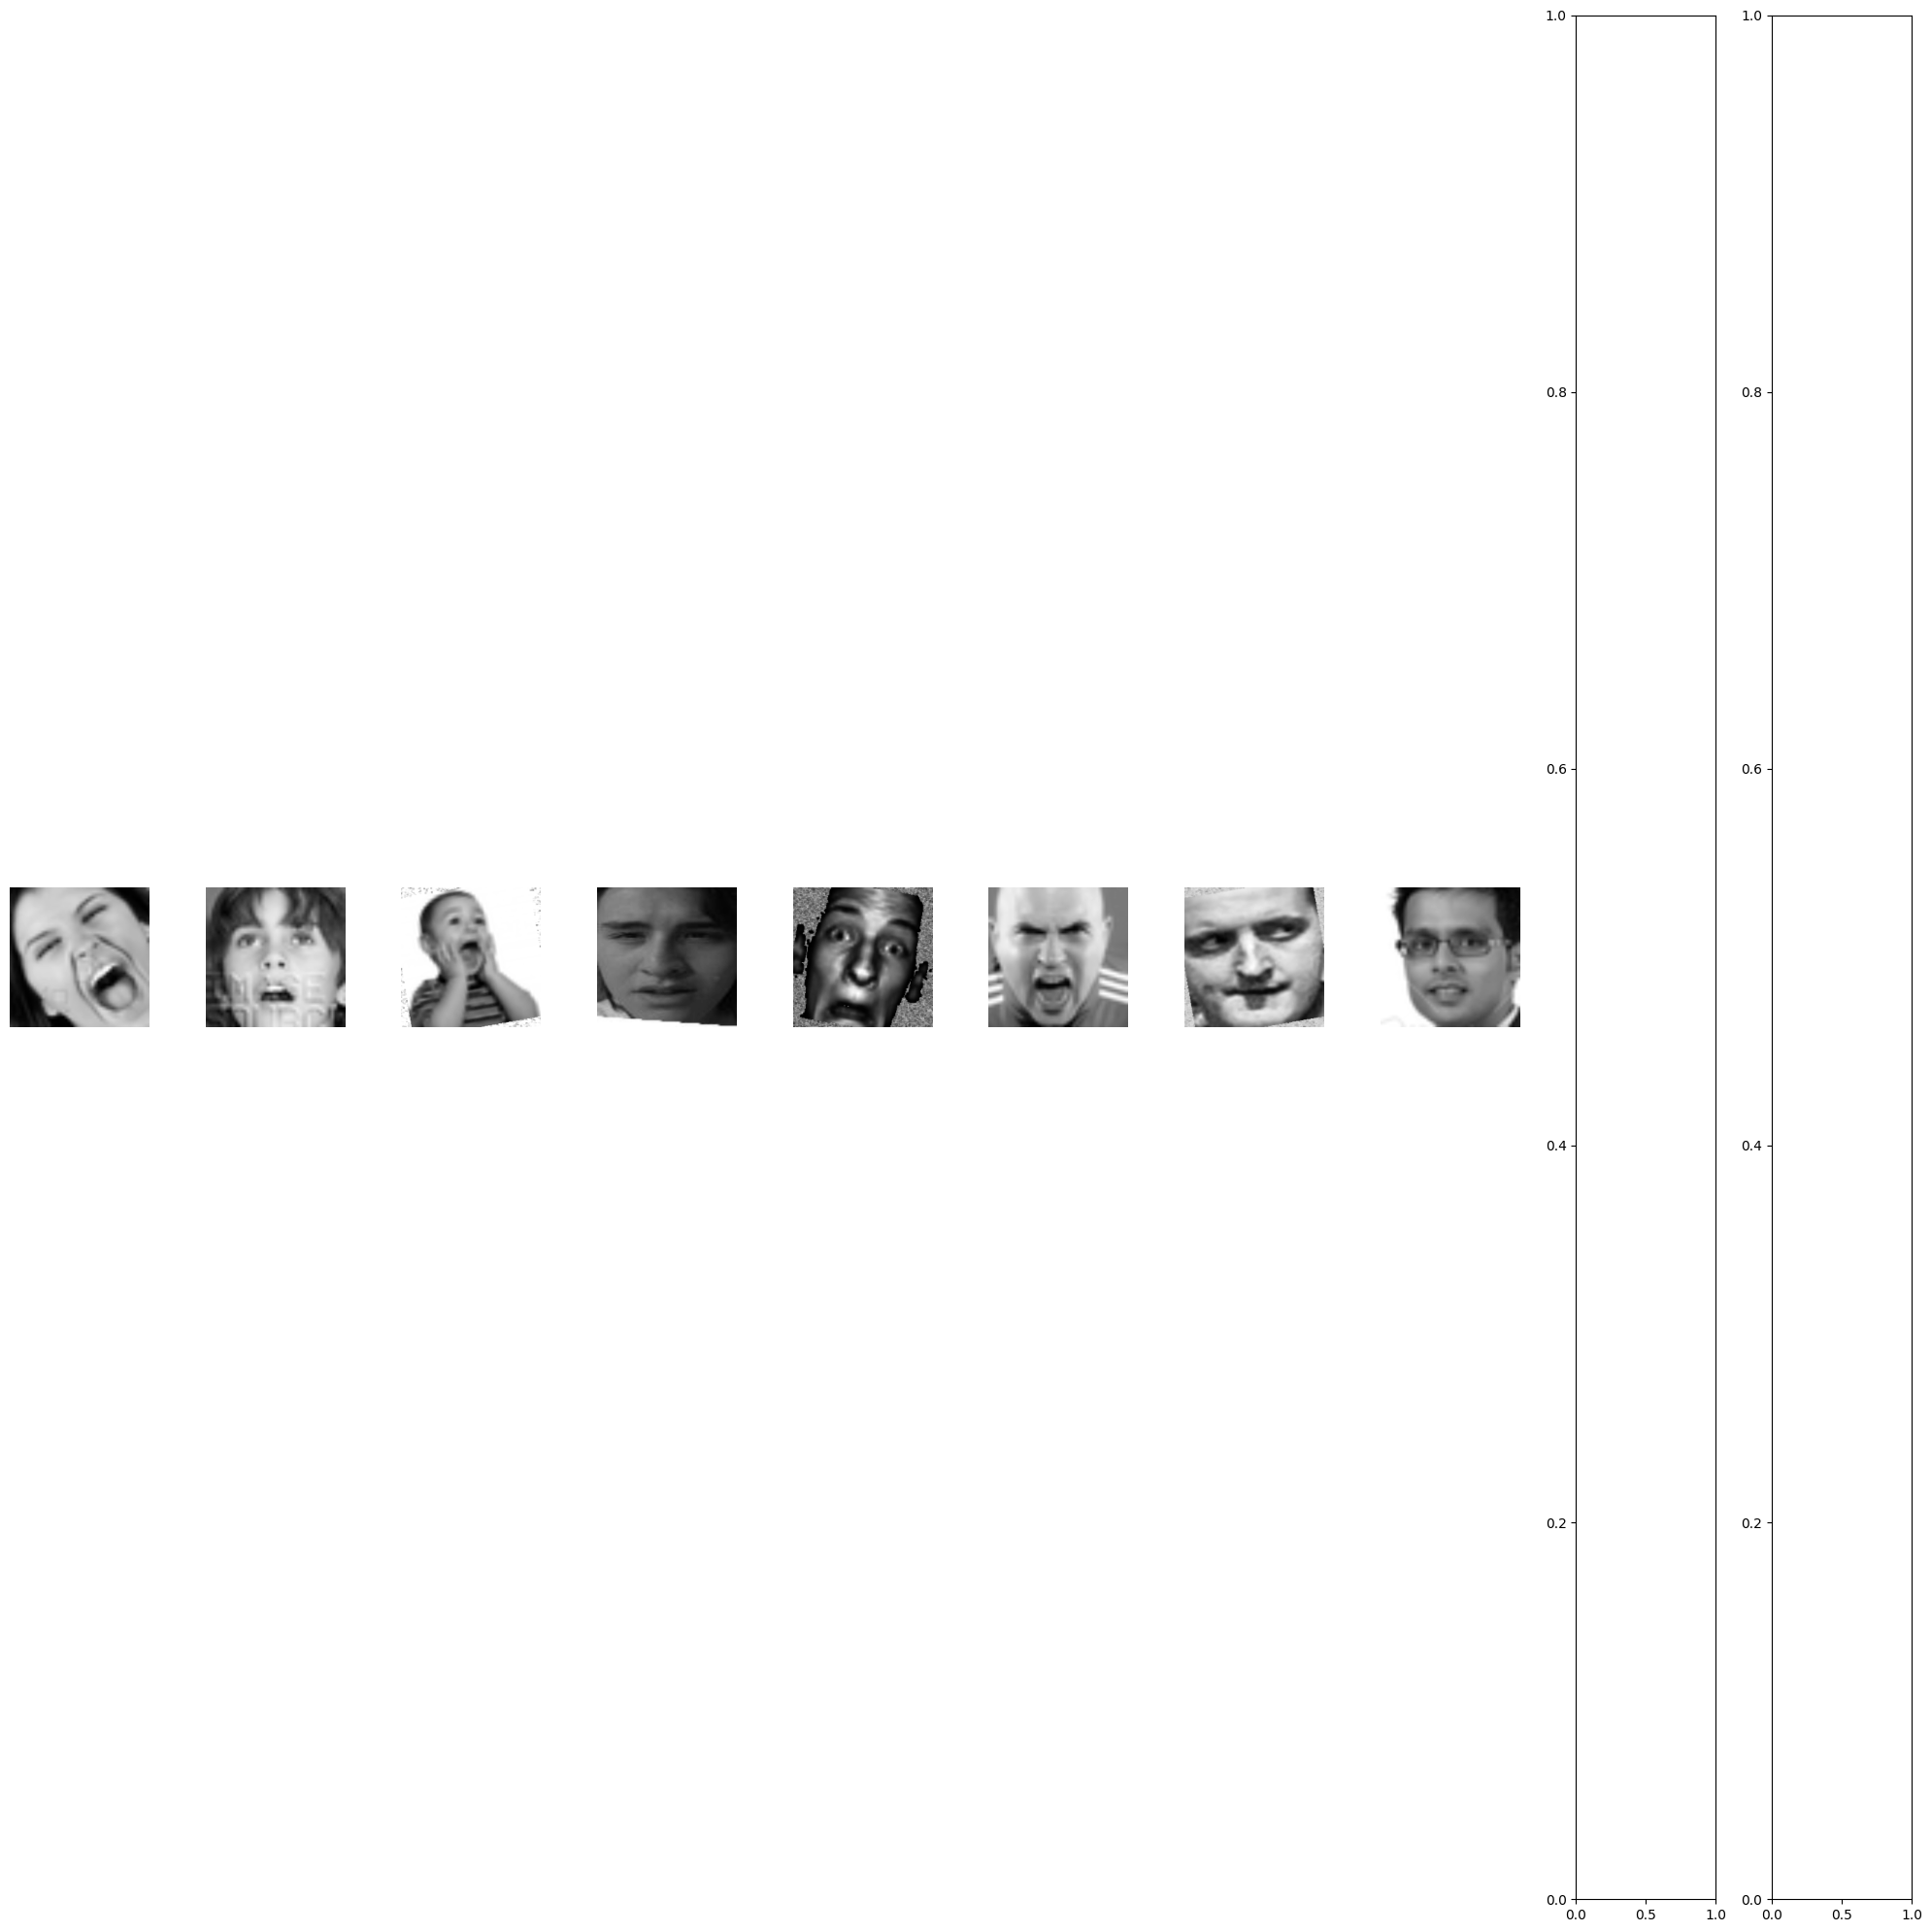

In [ ]:
imgs,labels=next(train_batches)
plotImages(imgs)

In [ ]:
import sklearn
import numpy as np
# Assuming you have an image data generator named train_datagen
class_labels = train_batches.classes
class_weights = sklearn.utils.compute_class_weight('balanced', classes=np.unique(class_labels),y= class_labels)
class_weight_dict = dict(enumerate(class_weights))

In [ ]:
NUM_CLASSES = 7
TRAIN_EPOCH = 100
TRAIN_LR = 1e-4
TRAIN_ES_PATIENCE = 5
TRAIN_LR_PATIENCE = 3
TRAIN_MIN_LR = 1e-6
ES_LR_MIN_DELTA = 0.003
# Set random seed for reproducibility
tf.random.set_seed(9)

In [ ]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3),strides=2 ,padding="same",activation=None, input_shape=(224, 224, 1),kernel_initializer='random_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())

model.add(tf.keras.layers.DepthwiseConv2D(3,(1,1),padding="same",depth_multiplier=1,activation=None,kernel_initializer='random_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())

model.add(tf.keras.layers.Conv2D(64, (1, 1),strides=1 ,padding="same",activation=None,kernel_initializer='random_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())

model.add(tf.keras.layers.DepthwiseConv2D(3,(2,2) ,padding="same",depth_multiplier=1,activation=None,kernel_initializer='random_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())

model.add(tf.keras.layers.Conv2D(128, (1, 1),strides=1 ,padding="same",activation=None,kernel_initializer='random_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())

model.add(tf.keras.layers.DepthwiseConv2D(3,(1,1) ,padding="same",depth_multiplier=1,activation=None,kernel_initializer='random_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())

model.add(tf.keras.layers.Conv2D(128, (1, 1),strides=1 ,padding="same",activation=None,kernel_initializer='random_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())

model.add(tf.keras.layers.DepthwiseConv2D(3,(2,2) ,padding="same",depth_multiplier=1,activation=None,kernel_initializer='random_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())

model.add(tf.keras.layers.Conv2D(256, (1, 1),strides=1 ,padding="same",activation=None,kernel_initializer='random_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())

model.add(tf.keras.layers.DepthwiseConv2D(3,(1,1) ,padding="same",depth_multiplier=1,activation=None,kernel_initializer='random_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())

model.add(tf.keras.layers.Conv2D(512, (1, 1),strides=1 ,padding="same",activation=None,kernel_initializer='random_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())

model.add(tf.keras.layers.DepthwiseConv2D(3,(2,2) ,padding="same",depth_multiplier=1,activation=None,kernel_initializer='random_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())

model.add(tf.keras.layers.Conv2D(512, (1, 1),strides=1 ,padding="same",activation=None,kernel_initializer='random_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())

model.add(tf.keras.layers.DepthwiseConv2D(3,(1,1) ,padding="same",depth_multiplier=1,activation=None,kernel_initializer='random_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())

model.add(tf.keras.layers.Conv2D(512, (1, 1),strides=1 ,padding="same",activation=None,kernel_initializer='random_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())

model.add(tf.keras.layers.DepthwiseConv2D(3,(1,1) ,padding="same",depth_multiplier=1,activation=None,kernel_initializer='random_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())

model.add(tf.keras.layers.Conv2D(512, (1, 1),strides=1 ,padding="same",activation=None,kernel_initializer='random_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())

model.add(tf.keras.layers.DepthwiseConv2D(3,(1,1) ,padding="same",depth_multiplier=1,activation=None,kernel_initializer='random_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())


model.add(tf.keras.layers.DepthwiseConv2D(3,(2,2) ,padding="same",depth_multiplier=1,activation=None,kernel_initializer='random_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())

model.add(tf.keras.layers.Conv2D(1024, (1, 1),strides=1 ,padding="same",activation=None,kernel_initializer='random_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())

model.add(tf.keras.layers.AveragePooling2D(pool_size=(7),))
# Classification layers
model.add(tf.keras.layers.Dense(700, activation='relu',kernel_initializer='random_normal'))
model.add(tf.keras.layers.Dropout(0.5))  # Add dropout for regularization
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(NUM_CLASSES, activation='softmax',kernel_initializer='random_normal'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 32)      320       
                                                                 
 batch_normalization (Batch  (None, 112, 112, 32)      128       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 112, 112, 32)      0         
                                                                 
 depthwise_conv2d (Depthwis  (None, 112, 112, 32)      320       
 eConv2D)                                                        
                                                                 
 batch_normalization_1 (Bat  (None, 112, 112, 32)      128       
 chNormalization)                                                
                                                        

# Old Model


In [ ]:
model = tf.keras.models.Sequential()

# Feature extraction layers
model.add(tf.keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(48, 48, 1),padding="same"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(32, (5, 5), activation='relu',kernel_initializer='random_normal'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding="same",kernel_initializer='random_normal'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='random_normal'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu',padding="same",kernel_initializer='random_normal'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.SeparableConv2D(256, kernel_size=3, strides=2, padding='same', activation='relu',kernel_initializer='random_normal'))
model.add(tf.keras.layers.SeparableConv2D(256, kernel_size=3, strides=2, padding='valid', activation='relu',kernel_initializer='random_normal'))


model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu',padding="same",kernel_initializer='random_normal'))
model.add(tf.keras.layers.BatchNormalization())



model.add(tf.keras.layers.Flatten())
# Classification layers
model.add(tf.keras.layers.Dense(32, activation='relu',kernel_initializer='random_normal'))
model.add(tf.keras.layers.Dropout(0.5))  # Add dropout for regularization
model.add(tf.keras.layers.Dense(8, activation='softmax',kernel_initializer='random_normal'))

model.summary()

# compile the model

In [ ]:
# loss and optimizer
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
optim = tf.keras.optimizers.Adam(learning_rate=TRAIN_LR)
metrics = ["accuracy"]

model.compile(optimizer=optim, loss=loss, metrics=metrics)

In [ ]:

# Training Procedure
# this code sets up an early stopping callback that monitors the validation accuracy during training.
#If the validation accuracy does not improve for a certain number of epochs (patience),
#and the improvement is not greater than a minimum
#threshold (min_delta), training will stop early. Additionally, the model's weights will be restored to those from the epoch with the best validation accuracy.
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=TRAIN_ES_PATIENCE, min_delta=ES_LR_MIN_DELTA, restore_best_weights=True)


# this code sets up a learning rate callback that monitors the validation accuracy during training.
#If the validation accuracy does not improve for a certain number of epochs (patience),
#the learning rate will be reduced. The learning rate will not be reduced below a specified minimum value (min_lr).
learning_rate_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=TRAIN_LR_PATIENCE, verbose=2, min_delta=ES_LR_MIN_DELTA, min_lr=TRAIN_MIN_LR)


class StopTrainingCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super(StopTrainingCallback, self).__init__()
        self.best_val_acc = -float('inf')  # Initialize the best validation accuracy
        self.counter = 0  # Counter to keep track of consecutive epochs where training acc > validation acc

    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy'] > logs['val_accuracy']:
            # If training accuracy > validation accuracy
            if (logs['accuracy'] - logs['val_accuracy']) > 0.1:
                # If the difference is more than 10%
                self.counter += 1
                if self.counter >= 3:
                    print("Training accuracy exceeded validation accuracy by more than 5% for 3 consecutive epochs.")
                    self.model.stop_training = True
            else:
                self.counter = 0  # Reset counter if the difference is not more than 5%
        else:
            self.counter = 0  # Reset counter if training accuracy <= validation accuracy


In [ ]:
#model Training
history = model.fit(train_batches, epochs=TRAIN_EPOCH, validation_data=(validation_batches), verbose=1,
                     callbacks=[early_stopping_callback, learning_rate_callback])


Epoch 1/100
8631/8631 [==============================] - 183s 19ms/step - loss: 1.5493 - accuracy: 0.3927 - val_loss: 1.3117 - val_accuracy: 0.4957 - lr: 1.0000e-04
Epoch 2/100
8631/8631 [==============================] - 168s 19ms/step - loss: 1.0578 - accuracy: 0.6114 - val_loss: 0.9847 - val_accuracy: 0.6417 - lr: 1.0000e-04
Epoch 3/100
8631/8631 [==============================] - 168s 19ms/step - loss: 0.8419 - accuracy: 0.6978 - val_loss: 0.8229 - val_accuracy: 0.6938 - lr: 1.0000e-04
Epoch 4/100
8631/8631 [==============================] - 168s 19ms/step - loss: 0.7024 - accuracy: 0.7470 - val_loss: 0.8312 - val_accuracy: 0.7061 - lr: 1.0000e-04
Epoch 5/100
8631/8631 [==============================] - 168s 19ms/step - loss: 0.6032 - accuracy: 0.7842 - val_loss: 0.8118 - val_accuracy: 0.7269 - lr: 1.0000e-04
Epoch 6/100
8631/8631 [==============================] - 168s 19ms/step - loss: 0.5322 - accuracy: 0.8084 - val_loss: 0.7344 - val_accuracy: 0.7472 - lr: 1.0000e-04
Epoch 7/10

In [ ]:
model.evaluate(test_batches)

518/518 [==============================] - 8s 15ms/step - loss: 0.7346 - accuracy: 0.7936


[0.7346203923225403, 0.7936277985572815]

# Plot Report

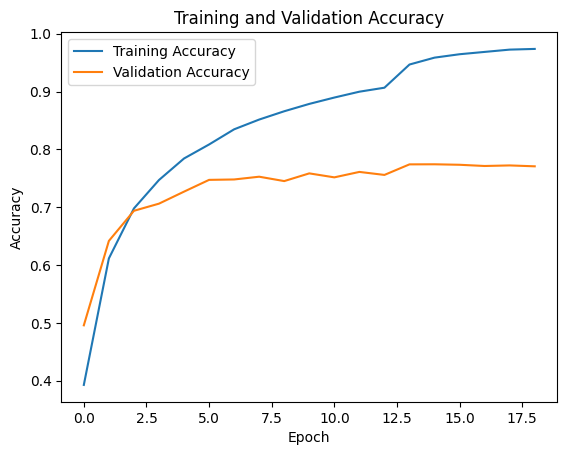

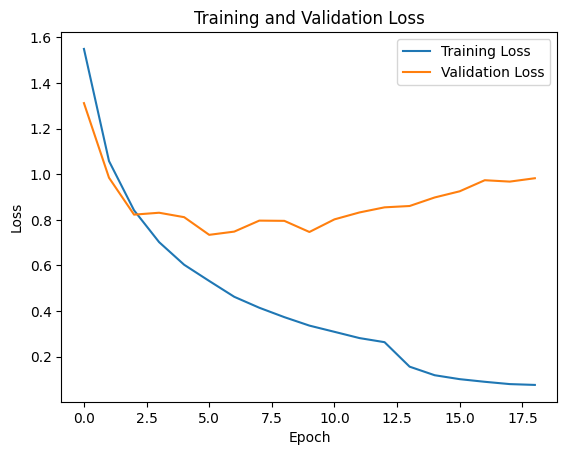

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save("FERPlus_19.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8631/8631 [==============================] - 123s 14ms/step


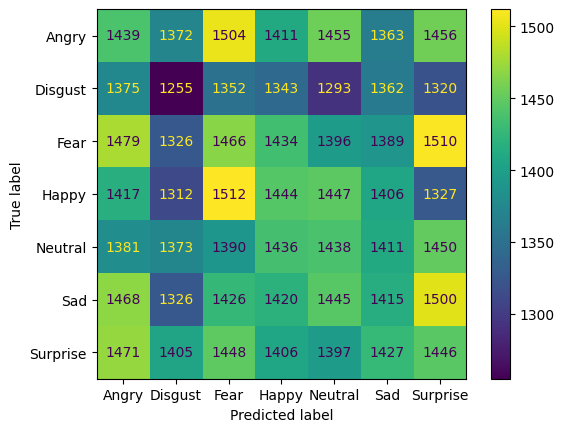

              precision    recall  f1-score   support

           0       0.14      0.14      0.14     10000
           1       0.13      0.13      0.13      9300
           2       0.15      0.15      0.15     10000
           3       0.15      0.15      0.15      9865
           4       0.15      0.15      0.15      9879
           5       0.14      0.14      0.14     10000
           6       0.14      0.14      0.14     10000

    accuracy                           0.14     69044
   macro avg       0.14      0.14      0.14     69044
weighted avg       0.14      0.14      0.14     69044



In [ ]:
from sklearn import metrics
import numpy as np
true_labels = train_batches.classes

# Generate predictions for your test data
predictions = model.predict(train_batches)
# Get the predicted labels by finding the index of the highest probability
predicted_labels = np.argmax(predictions, axis=1)
# Compute the confusion matrix
conf_matrix = metrics.confusion_matrix(true_labels, predicted_labels)
report=metrics.classification_report(true_labels, predicted_labels)
conf_matrix = metrics.confusion_matrix(true_labels, predicted_labels)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels =['Angry','Disgust', 'Fear',  'Happy', 'Neutral', 'Sad', 'Surprise'])

cm_display.plot()
plt.show()
# Plot the confusion matrix as a heatmap
print(report)

518/518 [==============================] - 8s 15ms/step


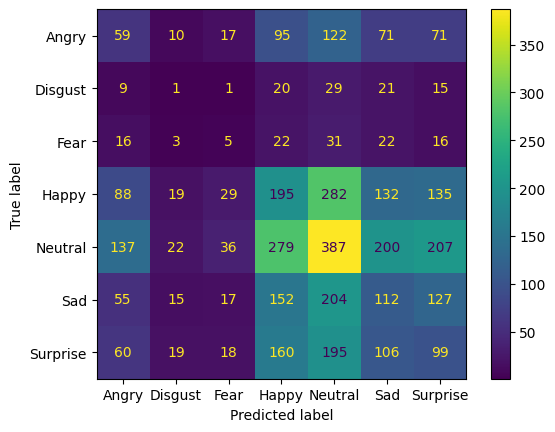

              precision    recall  f1-score   support

           0       0.14      0.13      0.14       445
           1       0.01      0.01      0.01        96
           2       0.04      0.04      0.04       115
           3       0.21      0.22      0.22       880
           4       0.31      0.31      0.31      1268
           5       0.17      0.16      0.17       682
           6       0.15      0.15      0.15       657

    accuracy                           0.21      4143
   macro avg       0.15      0.15      0.15      4143
weighted avg       0.21      0.21      0.21      4143



In [ ]:
from sklearn import metrics
import numpy as np
true_labels = test_batches.classes

# Generate predictions for your test data
predictions = model.predict(test_batches)
# Get the predicted labels by finding the index of the highest probability
predicted_labels = np.argmax(predictions, axis=1)
# Compute the confusion matrix
conf_matrix = metrics.confusion_matrix(true_labels, predicted_labels)
report=metrics.classification_report(true_labels, predicted_labels)
conf_matrix = metrics.confusion_matrix(true_labels, predicted_labels)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels =['Angry','Disgust', 'Fear',  'Happy', 'Neutral', 'Sad', 'Surprise'])

cm_display.plot()
plt.show()
# Plot the confusion matrix as a heatmap
print(report)

891/891 [==============================] - 13s 15ms/step


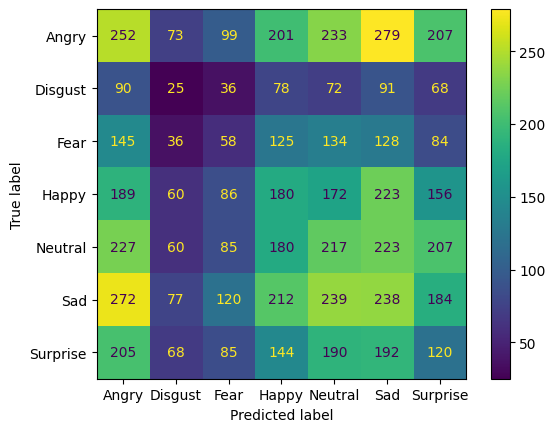

              precision    recall  f1-score   support

           0       0.18      0.19      0.19      1344
           1       0.06      0.05      0.06       460
           2       0.10      0.08      0.09       710
           3       0.16      0.17      0.16      1066
           4       0.17      0.18      0.18      1199
           5       0.17      0.18      0.18      1342
           6       0.12      0.12      0.12      1004

    accuracy                           0.15      7125
   macro avg       0.14      0.14      0.14      7125
weighted avg       0.15      0.15      0.15      7125



In [ ]:
from sklearn import metrics
import numpy as np
true_labels = validation_batches.classes

# Generate predictions for your test data
predictions = model.predict(validation_batches)
# Get the predicted labels by finding the index of the highest probability
predicted_labels = np.argmax(predictions, axis=1)
# Compute the confusion matrix
conf_matrix = metrics.confusion_matrix(true_labels, predicted_labels)
report=metrics.classification_report(true_labels, predicted_labels)
conf_matrix = metrics.confusion_matrix(true_labels, predicted_labels)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels =['Angry','Disgust', 'Fear',  'Happy', 'Neutral', 'Sad', 'Surprise'])

cm_display.plot()
plt.show()
# Plot the confusion matrix as a heatmap
print(report)

In [ ]:
model.summary()

In [ ]:
! cp /content/mobileNet-ferplus.h5 /content/drive/MyDrive

In [ ]:
train_batches.class_indices

{'anger': 0,
 'disgust': 1,
 'fear': 2,
 'happiness': 3,
 'neutral': 4,
 'sadness': 5,
 'surprise': 6}